In [2]:
%load_ext autoreload
%autoreload 2

import sys, os, multiprocessing
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

# import pandas as pd
import modin.pandas as pd
import time

from hydramuscle.model.smc import SMC
from hydramuscle.model.shell import Shell
from hydramuscle.postprocessing.force_encoder_2d import ForceEncoder2D

from hydramuscle.postprocessing.visualizer.save_video_parallel import *
from hydramuscle.postprocessing.visualizer.vlib import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
TOTAL_TIME = 100
TIME_STEP = 0.0002
NUMX = 100
NUMY = 100

In [4]:
def load_data(project, save_interval, numx=200, numy=200):
    # Load Calcium Data
    source = "/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/"+ project +".csv"
    start = time.time()
    c = pd.read_csv(source)
    c = c.values

    # Encode Calcium Data into Force Data
    encode_interval = TIME_STEP*save_interval
    force = ForceEncoder2D.encode(c, numx, numy, encode_interval)
    
    return c, force

def plot_results(time_list, save_interval, start_index, end_index, numx=200, numy=200):
    plot_frames(c, numx, numy, time_list, TIME_STEP*save_interval, 0, 1)
    plot_frames(force, numx, numy, time_list, TIME_STEP*save_interval, 0, 4)
    save_curve(x=c[:,start_index:end_index],
               dt=TIME_STEP*save_interval,
               xlabel="time[s]",
               ylabel="calcium[uM]",
               title="Calcium Traces",
               filename=None,
               show=True, 
               save=False)

    save_curve(x=force[:,start_index:end_index],
               dt=TIME_STEP*save_interval,
               xlabel="time[s]",
               ylabel="force[a.u.]",
               title="Active Force Traces",
               filename=None,
               show=True, 
               save=False)

100%|██████████| 5000/5000 [00:35<00:00, 142.49it/s]


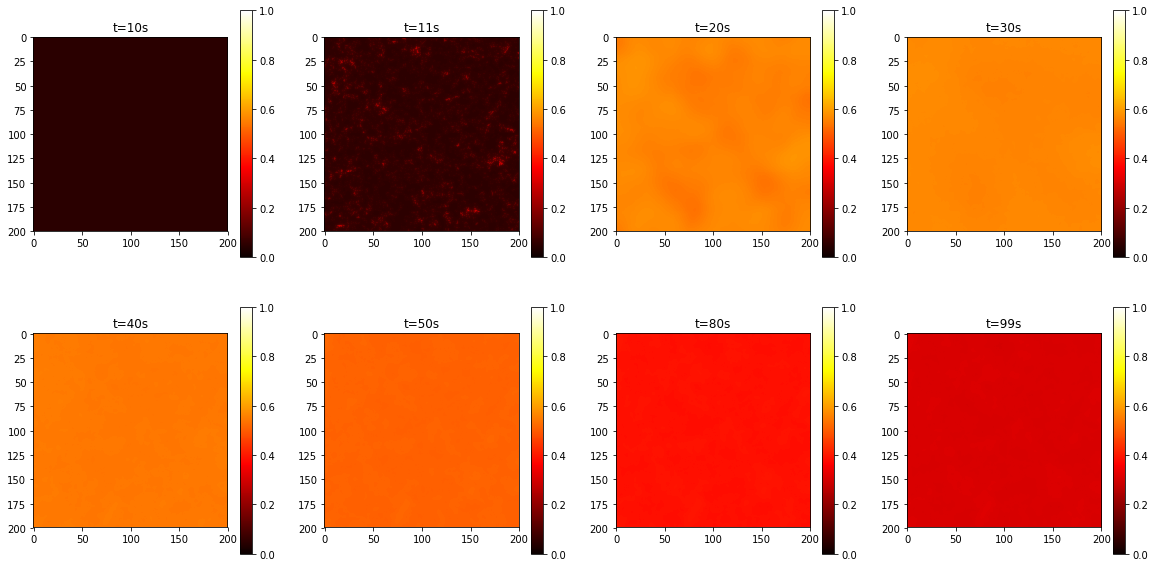

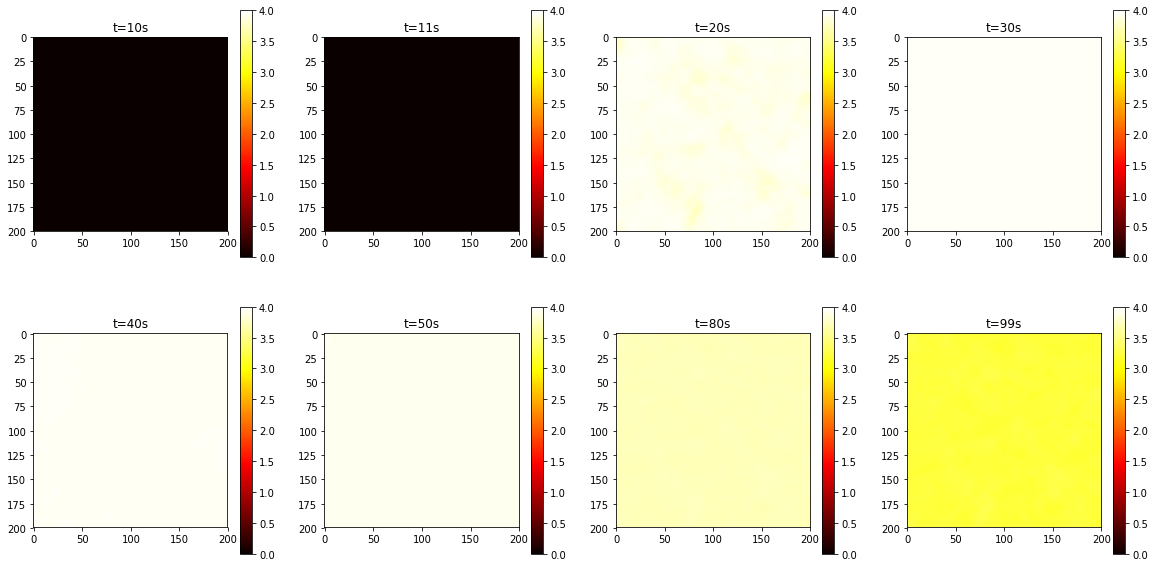

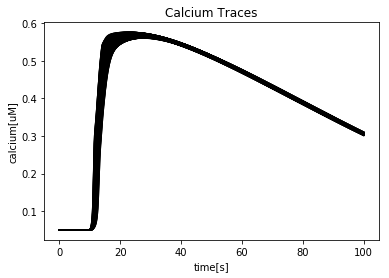

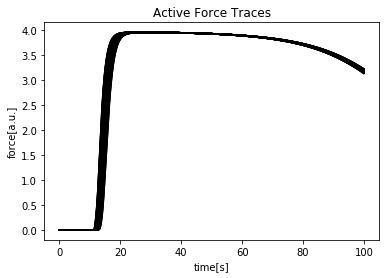

In [4]:
project = "200x200_100s_elong_k2_005_s0_400_v7_001_activev8_10_k9_001_gkca_00" # s0=200, v7=0.02
save_interval = 100
time_list = [10, 11, 20, 30, 40, 50, 80, 99]
c, force = load_data(project, save_interval)
plot_results(time_list, save_interval, 19900, 20100)

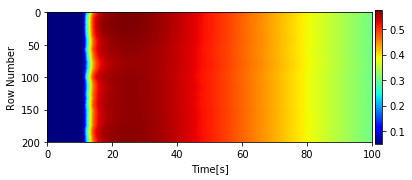

In [6]:
c_reshaped = np.reshape(c, (5000, 200, 200))
c_compressed = np.mean(c_reshaped, 1)

fig, ax = plt.subplots()
im = ax.imshow(c_compressed.T, cmap='jet', aspect=10)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=10)
plt.colorbar(im, fraction=0.02, pad=0.01)
ax.set_xticklabels([0,0, 20,40,60,80,100])
ax.set_xlabel('Time[s]')
ax.set_ylabel('Row Number')
plt.savefig('/media/hengji/DATA/Data/Documents/hydramuscle/results/for_cosyne/elongation_calcium_sptm.png', dpi=900, bbox_inches='tight')
plt.show()

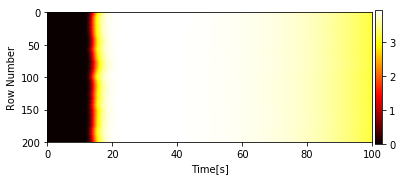

In [7]:
f_reshaped = np.reshape(force, (5000, 200, 200))
f_compressed = np.mean(f_reshaped, 1)

fig, ax = plt.subplots()
im = ax.imshow(f_compressed.T, cmap='hot', aspect=10)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=10)
plt.colorbar(im, fraction=0.02, pad=0.01)
ax.set_xticklabels([0,0, 20,40,60,80,100])
ax.set_xlabel('Time[s]')
ax.set_ylabel('Row Number')
plt.savefig('/media/hengji/DATA/Data/Documents/hydramuscle/results/for_cosyne/elongation_force_sptm.png', dpi=900, bbox_inches='tight')
plt.show()

In [9]:
c_reshaped.shape

(5000, 200, 200)

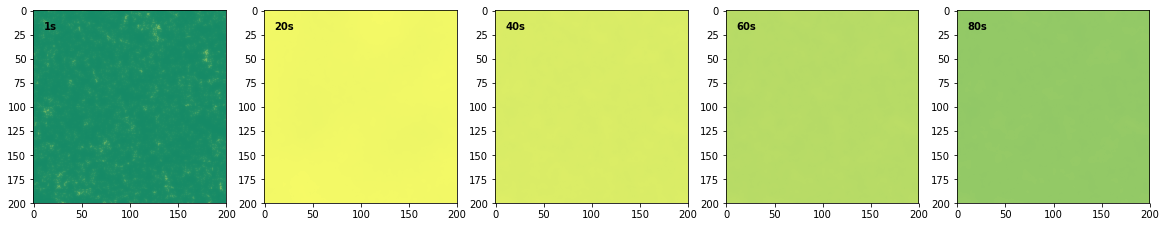

In [27]:
from scipy import ndimage

plt.figure(figsize=(20, 10))
# fig, axes = plt.subplots(nrows=1, ncols=5)
plt.subplot(151)
plt.imshow(ndimage.rotate(c_reshaped[int(11/0.02)], 90), cmap='summer', vmin=0, vmax=0.6)
plt.text(x=10,y=20,s='1s',fontdict={'style':'normal','weight':'bold'})
plt.subplot(152)
plt.imshow(ndimage.rotate(c_reshaped[int(30/0.02)], 90), cmap='summer', vmin=0, vmax=0.6)
plt.text(x=10,y=20,s='20s',fontdict={'style':'normal','weight':'bold'})
plt.subplot(153)
plt.imshow(ndimage.rotate(c_reshaped[int(50/0.02)], 90), cmap='summer', vmin=0, vmax=0.6)
plt.text(x=10,y=20,s='40s',fontdict={'style':'normal','weight':'bold'})
plt.subplot(154)
plt.imshow(ndimage.rotate(c_reshaped[int(70/0.02)], 90), cmap='summer', vmin=0, vmax=0.6)
plt.text(x=10,y=20,s='60s',fontdict={'style':'normal','weight':'bold'})
plt.subplot(155)
plt.imshow(ndimage.rotate(c_reshaped[int(90/0.02)], 90), cmap='summer', vmin=0, vmax=0.6)
plt.text(x=10,y=20,s='80s',fontdict={'style':'normal','weight':'bold'})
fig.colorbar(im, ax=axes.ravel().tolist(), fraction=0.01, pad=100)
plt.savefig('/media/hengji/DATA/Data/Documents/hydramuscle/results/for_cosyne/elongation_frames.png', dpi=900, bbox_inches='tight')

100%|██████████| 10000/10000 [01:15<00:00, 133.27it/s]


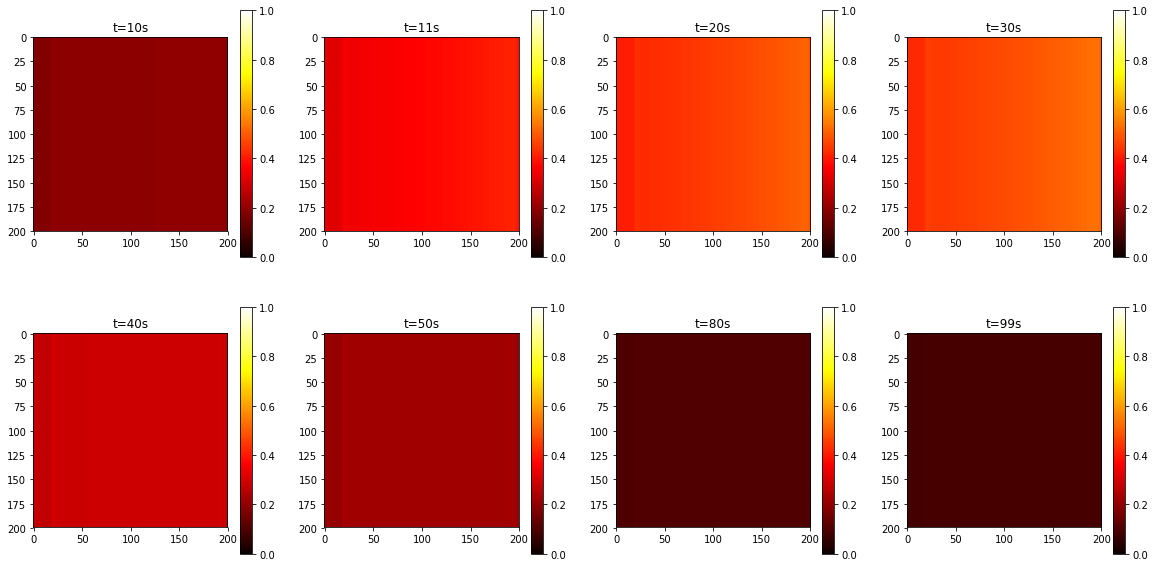

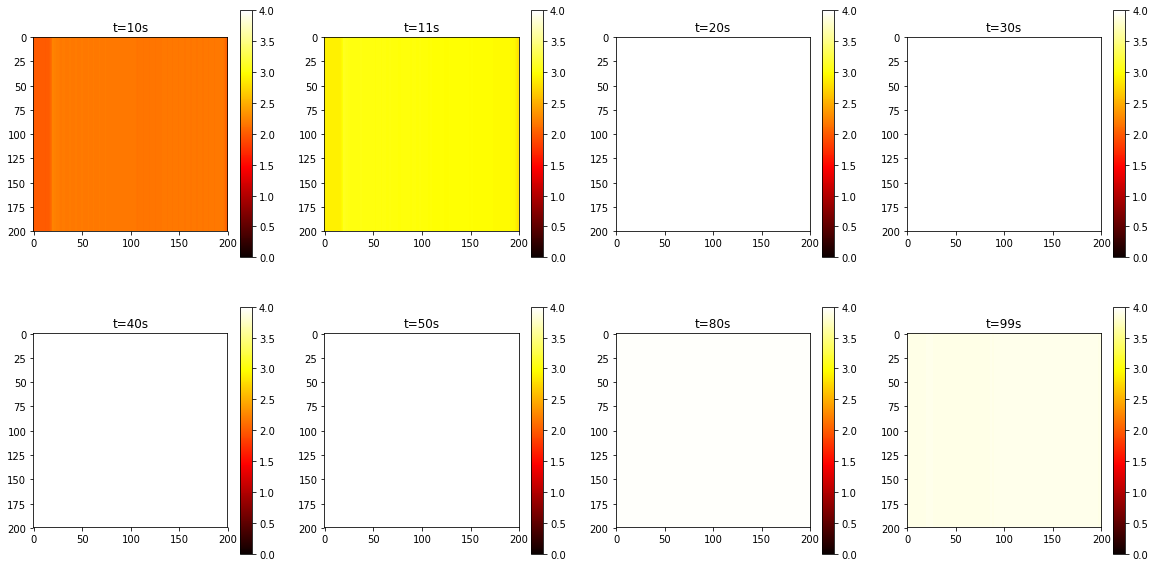

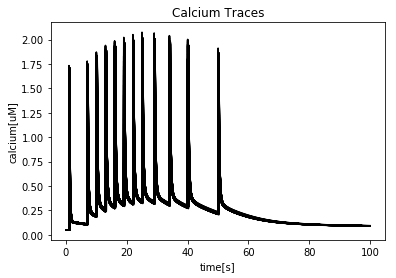

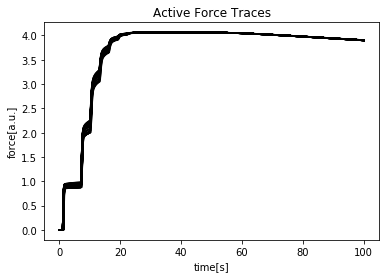

In [6]:
project = "200x200_100s_cb_k2_005_s0_100_v7_00_activev8_1" # s0=200, v7=0.02
save_interval = 50
time_list = [10, 11, 20, 30, 40, 50, 80, 99]
c, force = load_data(project, save_interval)
plot_results(time_list, save_interval, 19900, 20100)

In [7]:
df = pd.DataFrame(force)
df.to_csv('../results/data/force/200x200_100s_for_cosyne_cb.csv', index = False)

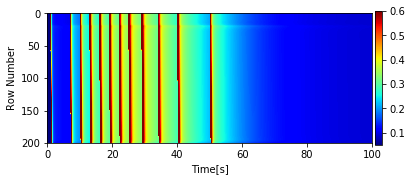

In [31]:
c_reshaped = np.reshape(c, (10000, 200, 200))
c_compressed = np.mean(c_reshaped, 1)

fig, ax = plt.subplots()
im = ax.imshow(c_compressed.T, vmax=0.6, cmap='jet', aspect=20)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=10)
plt.colorbar(im, fraction=0.02, pad=0.01)
ax.set_xticklabels([0,0, 20,40,60,80,100])
ax.set_xlabel('Time[s]')
ax.set_ylabel('Row Number')
plt.savefig('/media/hengji/DATA/Data/Documents/hydramuscle/results/for_cosyne/cb_calcium_sptm.png', dpi=900, bbox_inches='tight')
plt.show()

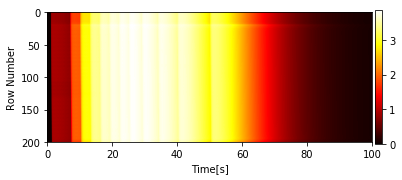

In [32]:
f_reshaped = np.reshape(force, (10000, 200, 200))
f_compressed = np.mean(f_reshaped, 1)

fig, ax = plt.subplots()
im = ax.imshow(f_compressed.T, cmap='hot', aspect=20)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=10)
plt.colorbar(im, fraction=0.02, pad=0.01)
ax.set_xticklabels([0,0, 20,40,60,80,100])
ax.set_xlabel('Time[s]')
ax.set_ylabel('Row Number')
plt.savefig('/media/hengji/DATA/Data/Documents/hydramuscle/results/for_cosyne/cb_force_sptm.png', dpi=900, bbox_inches='tight')
plt.show()

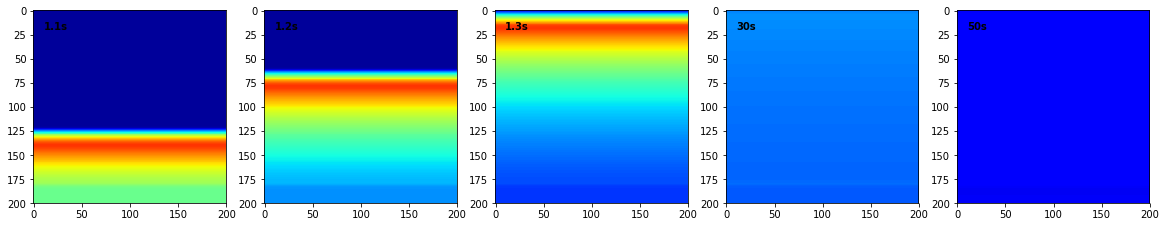

In [47]:
from scipy import ndimage

plt.figure(figsize=(20, 10))
# fig, axes = plt.subplots(nrows=1, ncols=5)
plt.subplot(151)
plt.imshow(ndimage.rotate(c_reshaped[int(1.1/0.01)], 90), cmap='jet', vmin=0, vmax=2)
plt.text(x=10,y=20,s='1.1s',fontdict={'style':'normal','weight':'bold'})
plt.subplot(152)
plt.imshow(ndimage.rotate(c_reshaped[int(1.2/0.01)], 90), cmap='jet', vmin=0, vmax=2)
plt.text(x=10,y=20,s='1.2s',fontdict={'style':'normal','weight':'bold'})
plt.subplot(153)
plt.imshow(ndimage.rotate(c_reshaped[int(1.3/0.01)], 90), cmap='jet', vmin=0, vmax=2)
plt.text(x=10,y=20,s='1.3s',fontdict={'style':'normal','weight':'bold'})
plt.subplot(154)
plt.imshow(ndimage.rotate(c_reshaped[int(30/0.01)], 90), cmap='jet', vmin=0, vmax=2)
plt.text(x=10,y=20,s='30s',fontdict={'style':'normal','weight':'bold'})
plt.subplot(155)
plt.imshow(ndimage.rotate(c_reshaped[int(50/0.01)], 90), cmap='jet', vmin=0, vmax=2)
plt.text(x=10,y=20,s='50s',fontdict={'style':'normal','weight':'bold'})
fig.colorbar(im, ax=axes.ravel().tolist(), fraction=0.01, pad=100)

plt.savefig('/media/hengji/DATA/Data/Documents/hydramuscle/results/for_cosyne/contract_frames.png', dpi=900, bbox_inches='tight')

In [ ]:
project = "200x200_200s_cycle_ecto_k2_01_s0_400_v7_001_activev8_10_k9_008_gkca_1e-08" # s0=200, v7=0.02
save_interval = 50
time_list = [10, 11, 20, 30, 40, 50, 80, 100, 120, 140, 160, 180]
c, force = load_data(project, save_interval)
plot_results(time_list, save_interval, 19900, 20100)

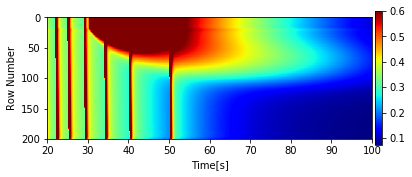

In [49]:
c_reshaped = np.reshape(c, (20000, 200, 200))
# c_compressed = np.mean(c_reshaped[3000:10000], 1)
c_compressed = c_reshaped[2000:10000, 100, :]

fig, ax = plt.subplots()
im = ax.imshow(c_compressed.T, vmax=0.6, cmap='jet', aspect=15)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=10)
plt.colorbar(im, fraction=0.02, pad=0.01)
ax.set_xticklabels([0, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_xlabel('Time[s]')
ax.set_ylabel('Row Number')
plt.savefig('/media/hengji/DATA/Data/Documents/hydramuscle/results/for_cosyne/bend_calcium_sptm.png', dpi=900, bbox_inches='tight')
plt.show()

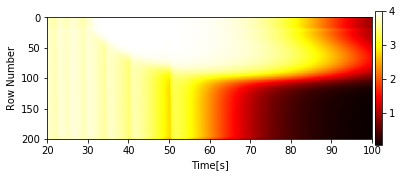

In [50]:
f_reshaped = np.reshape(force, (20000, 200, 200))
# f_compressed = np.mean(f_reshaped[3000:10000], 1)
f_compressed = f_reshaped[2000:10000, 100, :]

fig, ax = plt.subplots()
im = ax.imshow(f_compressed.T, cmap='hot', aspect=15)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=10)
plt.colorbar(im, fraction=0.02, pad=0.01)
ax.set_xticklabels([0, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_xlabel('Time[s]')
ax.set_ylabel('Row Number')
plt.savefig('/media/hengji/DATA/Data/Documents/hydramuscle/results/for_cosyne/bend_force_sptm.png', dpi=900, bbox_inches='tight')
plt.show()

In [12]:
df = pd.DataFrame(force)
df.to_csv('../results/data/force/200x200_200s_for_cosyne_bending.csv', index = False)

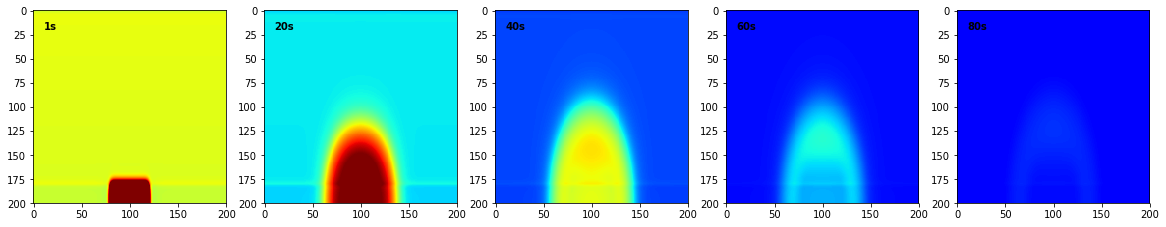

In [52]:
from scipy import ndimage

plt.figure(figsize=(20, 10))
plt.subplot(151)
plt.imshow(ndimage.rotate(c_reshaped[3100], 90), cmap='jet', vmin=0, vmax=0.6)
plt.text(x=10,y=20,s='1s',fontdict={'style':'normal','weight':'bold'})
plt.subplot(152)
plt.imshow(ndimage.rotate(c_reshaped[5000], 90), cmap='jet', vmin=0, vmax=0.6)
plt.text(x=10,y=20,s='20s',fontdict={'style':'normal','weight':'bold'})
plt.subplot(153)
plt.imshow(ndimage.rotate(c_reshaped[7000], 90), cmap='jet', vmin=0, vmax=0.6)
plt.text(x=10,y=20,s='40s',fontdict={'style':'normal','weight':'bold'})
plt.subplot(154)
plt.imshow(ndimage.rotate(c_reshaped[9000], 90), cmap='jet', vmin=0, vmax=0.6)
plt.text(x=10,y=20,s='60s',fontdict={'style':'normal','weight':'bold'})
plt.subplot(155)
plt.imshow(ndimage.rotate(c_reshaped[11000], 90), cmap='jet', vmin=0, vmax=0.6)
plt.text(x=10,y=20,s='80s',fontdict={'style':'normal','weight':'bold'})
plt.savefig('/media/hengji/DATA/Data/Documents/hydramuscle/results/for_cosyne/bend_frames.png', dpi=900, bbox_inches='tight')